<a href="https://colab.research.google.com/github/Phantom1746a/Intro-To-Autoencoder-In-PyTorch/blob/main/AutoencoderIntroPyTorch_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Autoencoders
Autoencoders are a type of neural network which generates an “n-layer” coding of the given input and attempts to reconstruct the input using the code generated

#Installing Pytorch

In [1]:

!pip install torch

#Torchvision:
This module consists of a wide range of databases, image architectures, and transformations for computer vision

In [2]:
!pip install torchvision

In [3]:
import torch
from torchvision import datasets
from torchvision import transforms
import matplotlib.pyplot as plt

 #Loading the Dataset

The code loads the MNIST dataset into loader using DataLoader module. The dataset is downloaded and transformed into image tensors.

In [4]:
# Transform Images to Pytorch Tensor
tensor_transform = transforms.ToTensor()

#Download th MNIST dataset
dataset= datasets.MNIST(root="./data", train=True, download=True, transform=tensor_transform)

#loading The dataset
loader = torch.utils.data.DataLoader(dataset=dataset, batch_size=32, shuffle=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:02<00:00, 4557065.35it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 134108.25it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1088495.03it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 9901522.23it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## Creating AutoEncoder class
The dimensions of models are as below

#Encoder
28*28=784==> 128==> 64==> 36==> 18==> 9
#Decoder
9==> 18==> 36==> 64==> 128==> 28*28=784


In [5]:
class AutoEncoder(torch.nn.Module):
  def __init__(self):
    super().__init__()

    #Building Encoder With ReLu Activation
    self.encoder = torch.nn.Sequential(
        torch.nn.Linear(28*28,128),
        torch.nn.ReLU(),
        torch.nn.Linear(128,64),
        torch.nn.ReLU(),
        torch.nn.Linear(64,36),
        torch.nn.ReLU(),
        torch.nn.Linear(36,18),
        torch.nn.ReLU(),
        torch.nn.Linear(18,9),
    )



    #Building Decoder
    self.decoder = torch.nn.Sequential(
        torch.nn.Linear(9,18),
        torch.nn.ReLU(),
        torch.nn.Linear(18,36),
        torch.nn.ReLU(),
        torch.nn.Linear(36,64),
        torch.nn.ReLU(),
        torch.nn.Linear(64,128),
        torch.nn.ReLU(),
        torch.nn.Linear(128,28*28,),
        torch.nn.Sigmoid(),

)

  def forward(self,x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

#Initializing model

In [6]:
model = AutoEncoder()

#We validate the model using the Mean Squared Error function,

loss_function = torch.nn.MSELoss()

#we use an Adam Optimizer with a learning rate of 0.1 and weight of 1e-8

optimizer =torch.optim.Adam(model.parameters(),
                            lr=1e-1,
                            weight_decay=1e-8)


In [18]:

epochs = 10
outputs = []
losses = []
for epoch in range(epochs):
    for (image, _) in loader:

      # Reshaping the image to (-1, 784)
      image = image.reshape(-1, 28*28)

      # Output of Autoencoder
      reconstructed = model(image)

      # Calculating the loss function
      loss = loss_function(reconstructed, image)

      # The gradients are set to zero,
      # the gradient is computed and stored.
      # .step() performs parameter update
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

      # Storing the losses in a list for plotting
      losses.append(loss)
      #print(f'Epoch:{epoch+1}, Loss:{loss.item():.4f}')
    outputs.append((epochs, image, reconstructed))



# Input/Reconstructed Input to/from Autoencoder

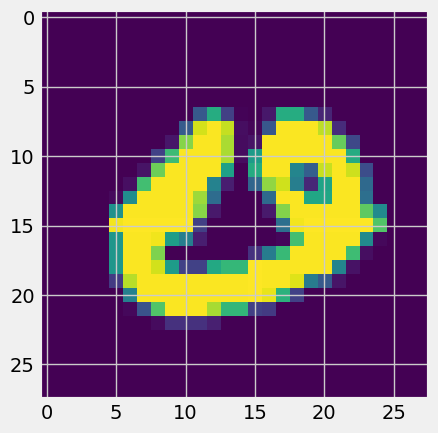

In [20]:
for i, item in enumerate(image):

  # Reshape the array for plotting
  item = item.reshape(-1, 28, 28)
  plt.imshow(item[0])



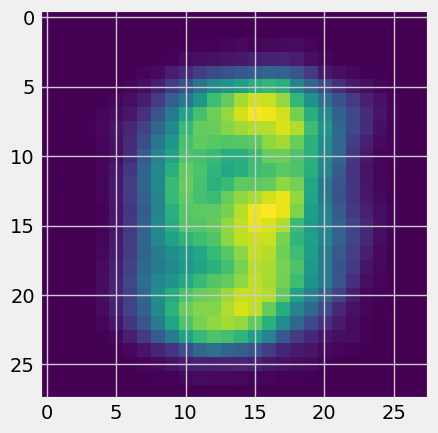

In [21]:
for i, item in enumerate(reconstructed):
  # Detach the tensor from the computation graph and convert to NumPy array
  item = item.detach().numpy().reshape(-1, 28, 28)
  plt.imshow(item[0])

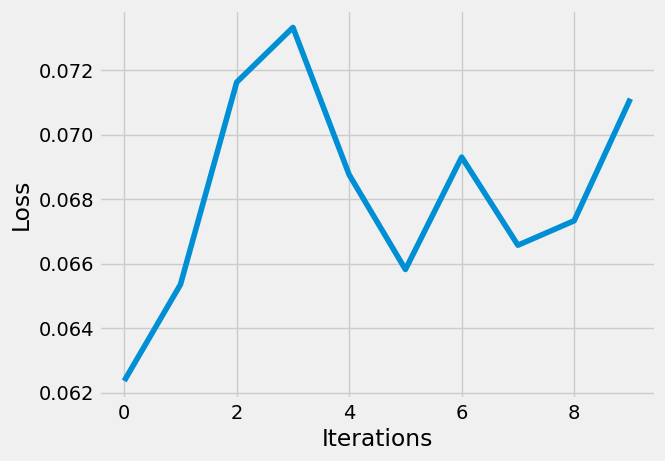

In [22]:
# Defining the Plot Style
plt.style.use('fivethirtyeight')
plt.xlabel('Iterations')
plt.ylabel('Loss')

# Plotting the last 100 values
# Convert the tensors to NumPy arrays and extract the scalar loss values
plt.plot([loss.detach().numpy().item() for loss in losses[-10:]])